# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any LGAs over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#heat map LGA Sport 
#dot 2 matpltlib discrete horizontal bar chart 
#consolidate less common sports 
#dot 3 normalise / LGA over rep when more people

In [2]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [3]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

<ipython-input-3-8c32cb05a179>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [4]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


This data frame can then be joined with the vouchers data frame to create one master data frame containing both the voucher data and the SEIFA measures.

In [5]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


In [6]:

print("Number of LGA's:", len(set(sa_vouchers_scores.Participant_LGA)))
print("Number of Sports:", len(set(sa_vouchers_scores.Voucher_Sport)))


Number of LGA's: 69
Number of Sports: 50


<AxesSubplot:xlabel='Count', ylabel='Participant_LGA'>

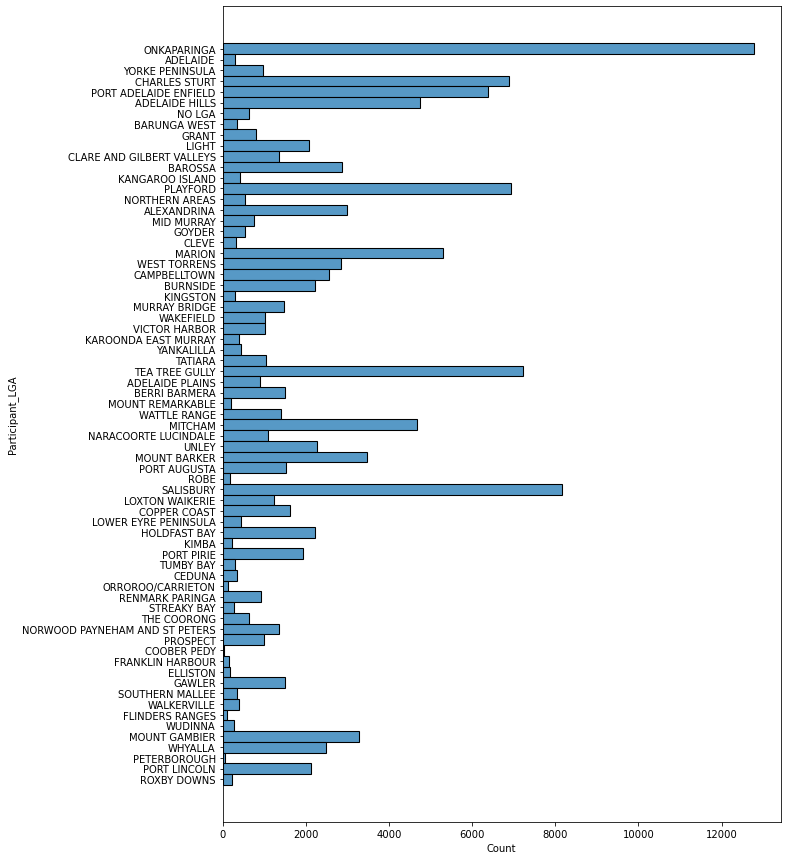

In [7]:
plt.figure(figsize=(10,15))
sns.histplot(sa_vouchers_scores, y="Participant_LGA")

<AxesSubplot:xlabel='Count', ylabel='Voucher_Sport'>

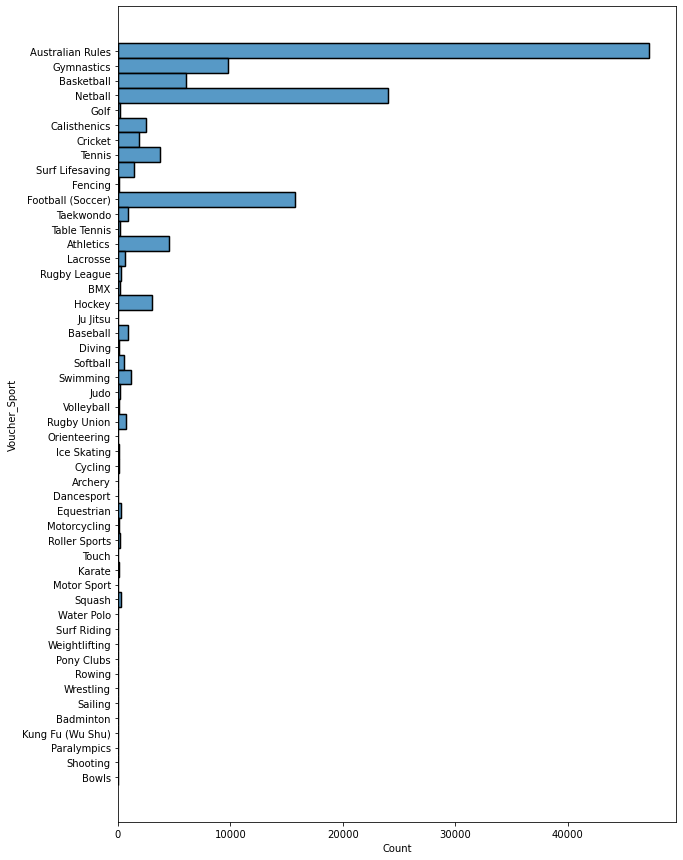

In [8]:
plt.figure(figsize=(10,15))
sns.histplot(sa_vouchers_scores, y='Voucher_Sport')

The above graphs utilising a histogram graph out line the distribution of the vouchers used for each sport and region. 

Based on the above grpahs. The below stand out: 

#### Regions:
* Onkaparinga 
* Salisbury
* Tea Tree Gully
* Kangaroo Island 
* Charles Sturt 

These regions apear to have the most vouchers claimed than others 

#### Sports: 
* Australian Rules 
* Netball 
* Football (Soccer)
* Gymnastics 
* Basket Ball

These sports apear to the most claimed vouchers that others

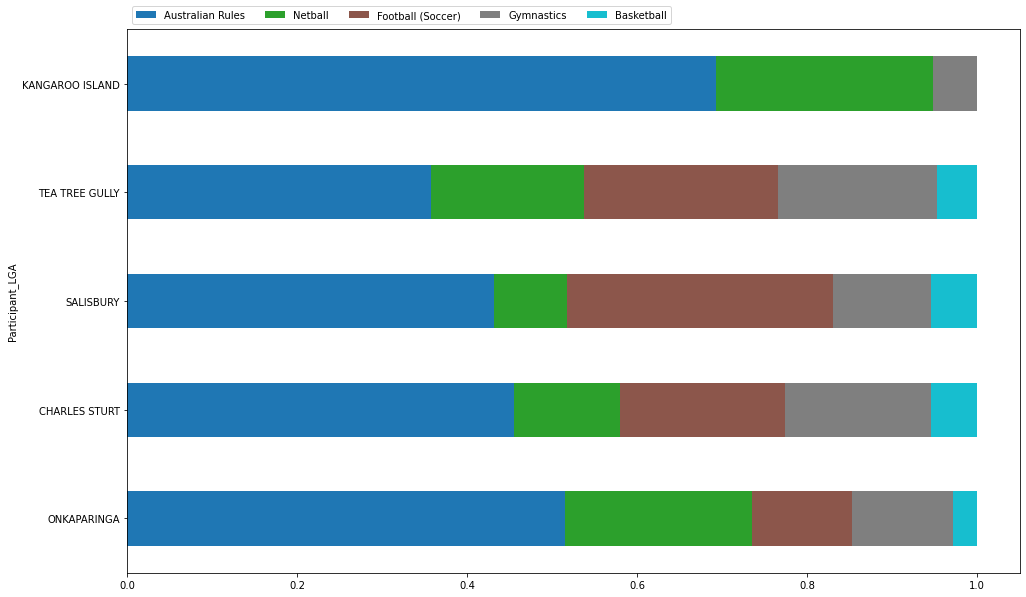

In [16]:
sets = sa_vouchers_scores.groupby(['Participant_LGA', 'Voucher_Sport']).Voucher_Sport.agg(Count='count')
sets = sets.pivot_table(index='Participant_LGA', columns='Voucher_Sport', values='Count')
sets = sets.loc[['ONKAPARINGA', 'CHARLES STURT', 'SALISBURY', 'TEA TREE GULLY', 'KANGAROO ISLAND']]
sets = sets[['Australian Rules', 'Netball', 'Football (Soccer)', 'Gymnastics', 'Basketball' ]]
sets = sets.div(sets.sum(axis=1), axis=0)

ax = sets.plot.barh(stacked=True, cmap='tab10', figsize=(16, 10))
ax.legend(ncol=len(sets.columns), bbox_to_anchor=(0,1), loc='lower left', fontsize='medium')

    

In [64]:
voucherDist = sa_vouchers_scores.groupby(['Participant_LGA']).Voucher_Sport.agg(Total_Count='count')
voucherDist['Per_Capita'] = voucherDist.div(LGA_scores.Population, axis=0)
voucherDist

,Total_Count,Per_Capita
Participant_LGA,,
ADELAIDE,302,0.015403
ADELAIDE HILLS,4756,0.123209
ADELAIDE PLAINS,899,NaN
ALEXANDRINA,2979,0.125733
BAROSSA,2874,0.129611
...,...,...
WEST TORRENS,2844,0.051773
WHYALLA,2488,0.112732
WUDINNA,267,0.212580


In [56]:
sportCount = sa_vouchers_scores.groupby(['Participant_LGA', 'Voucher_Sport']).Voucher_Sport.agg(Total_Count='count')
sportCount = sportCount.pivot_table(index='Participant_LGA', columns='Voucher_Sport', values='Total_Count')
sportCount = sportCount[['Australian Rules', 'Netball', 'Football (Soccer)', 'Gymnastics', 'Basketball' ]]
sportCount

Voucher_Sport,Australian Rules,Netball,Football (Soccer),Gymnastics,Basketball
Participant_LGA,,,,,
ADELAIDE,130.0,23.0,27.0,20.0,4.0
ADELAIDE HILLS,1412.0,1395.0,812.0,176.0,48.0
ADELAIDE PLAINS,485.0,160.0,93.0,18.0,15.0
ALEXANDRINA,980.0,860.0,510.0,86.0,204.0
BAROSSA,1196.0,445.0,197.0,117.0,341.0
...,...,...,...,...,...
WEST TORRENS,907.0,268.0,425.0,386.0,70.0
WHYALLA,569.0,509.0,268.0,154.0,605.0
WUDINNA,44.0,194.0,NaN,NaN,NaN


In [153]:
voucherUse1 = voucherDist.copy()
voucherUse1['Male_Total'] = sa_vouchers_scores.groupby(['Participant_LGA'])['Participant_Sex'].apply(lambda x: x[x == 'Male'].count())
voucherUse1['Female_Total'] = sa_vouchers_scores.groupby(['Participant_LGA'])['Participant_Sex'].apply(lambda x: x[x == 'Female'].count())
voucherUse1['Previous_Reg'] = sa_vouchers_scores.groupby(['Participant_LGA'])['Club_Previous_Member'].apply(lambda x: x[x == 'Registered Previously'].count())
voucherUse1['No_Previous_Reg'] = sa_vouchers_scores.groupby(['Participant_LGA'])['Club_Previous_Member'].apply(lambda x: x[x == 'Not Registered Previously'].count())
voucherUse1['ATSI_Count'] = sa_vouchers_scores.groupby(['Participant_LGA'])['Participant_ATSI_Indicator'].apply(lambda x: x[x == 'ATSI'].count())
voucherUse1['CALD_Count'] = sa_vouchers_scores.groupby(['Participant_LGA'])['Participant_CALD_Indicator'].apply(lambda x: x[x == 'CALD'].count())
voucherUse1

,Total_Count,Per_Capita,Male_Total,Female_Total,Previous_Reg,No_Previous_Reg,ATSI_Count,CALD_Count
Participant_LGA,,,,,,,,
ADELAIDE,302,0.015403,187,115,135,167,8,44
ADELAIDE HILLS,4756,0.123209,2522,2234,3078,1678,39,220
ADELAIDE PLAINS,899,NaN,557,342,479,420,24,13
ALEXANDRINA,2979,0.125733,1605,1374,1644,1335,73,58
BAROSSA,2874,0.129611,1742,1132,1879,995,23,52
...,...,...,...,...,...,...,...,...
WEST TORRENS,2844,0.051773,1664,1180,1537,1307,75,384
WHYALLA,2488,0.112732,1203,1285,1714,774,191,130
WUDINNA,267,0.212580,64,203,173,94,0,1


In [126]:
voucherUse = sa_vouchers_scores.groupby(['Participant_LGA']).Voucher_Sport.agg(Total_Count='count')
voucherUse = voucherUse.join(sportCount)
voucherUse

,Total_Count,Australian Rules,Netball,Football (Soccer),Gymnastics,Basketball
Participant_LGA,,,,,,
ADELAIDE,302,130.0,23.0,27.0,20.0,4.0
ADELAIDE HILLS,4756,1412.0,1395.0,812.0,176.0,48.0
ADELAIDE PLAINS,899,485.0,160.0,93.0,18.0,15.0
ALEXANDRINA,2979,980.0,860.0,510.0,86.0,204.0
BAROSSA,2874,1196.0,445.0,197.0,117.0,341.0
...,...,...,...,...,...,...
WEST TORRENS,2844,907.0,268.0,425.0,386.0,70.0
WHYALLA,2488,569.0,509.0,268.0,154.0,605.0
WUDINNA,267,44.0,194.0,NaN,NaN,NaN


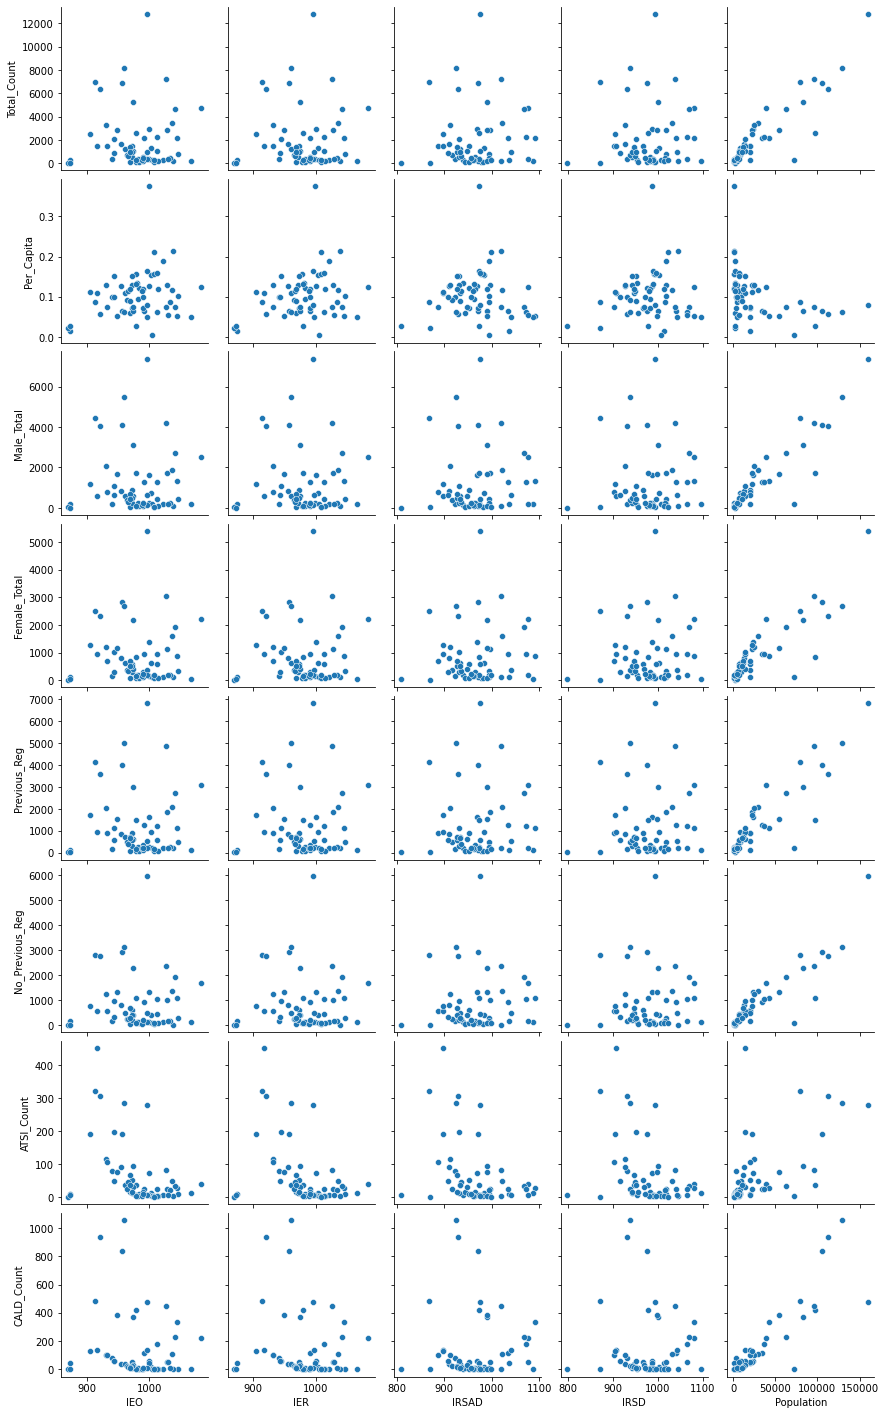

In [154]:
voucherUse = voucherUse1.join(LGA_scores)
sns.pairplot(voucherUse, y_vars=['Total_Count', 'Per_Capita', 'Male_Total', 'Female_Total', 'Previous_Reg', 
                                 'No_Previous_Reg', 'ATSI_Count', 'CALD_Count'], 
                         x_vars=['IEO', 'IER', 'IRSAD', 'IRSD','Population'])
#IEO	IER	IRSAD	IRSD	Population

## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [ ]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

In [ ]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head()